<a href="https://colab.research.google.com/github/AndresPautrat/MachineLearning_UPC/blob/main/SegundaMitad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870488944, tolerance: 0.002065280097246271
  positive)


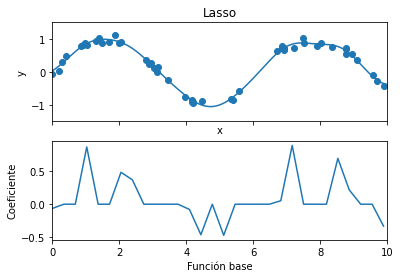

In [ ]:
from sklearn.linear_model import Lasso
modelo = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
plot_base(modelo, title='Lasso')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030798617745369516, tolerance: 0.002065280097246271
  positive)


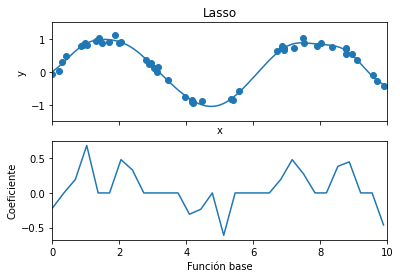

In [ ]:
from sklearn.linear_model import Lasso
modelo = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.0005))
plot_base(modelo, title='Lasso')

Con la penalidad de Lasso, la mayoría de coeficientes llegan a ser cero. 

In [ ]:
modelo.predict(xfit[:,np.newaxis])

In [ ]:
y

array([-0.92530881,  0.71111718, -0.06598087,  0.11672496,  0.88294471,
        0.8210899 ,  1.12370616, -0.23467501, -0.75446517, -0.86898322,
       -0.94231439,  0.70804351,  0.89495535,  0.53638242,  0.28955648,
        0.61914583, -0.84603144, -0.5796531 ,  1.01611705,  0.88180869,
        0.87399567, -0.28992469, -0.01353862,  0.65589053,  0.69771523,
        0.55374595,  0.78013085,  0.46920917,  0.91644209,  0.72516826,
        0.8837173 , -0.90676173, -0.10465615, -0.82186313,  0.70681199,
        0.13841844,  0.76810625,  0.74161023,  0.03745364,  0.88805266,
       -0.43137564,  1.01910093,  0.36236496,  0.7970268 ,  0.82783992,
       -0.89007576,  0.35538665,  0.28020998,  0.23855606,  0.94355877])

## 2.5. Medidas de desempeño

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Cargamos un dataset: Boston
boston = load_boston()
print(boston.DESCR)

In [ ]:
X = boston.data
Y = boston.target

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
#Target
df['Price'] = boston.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


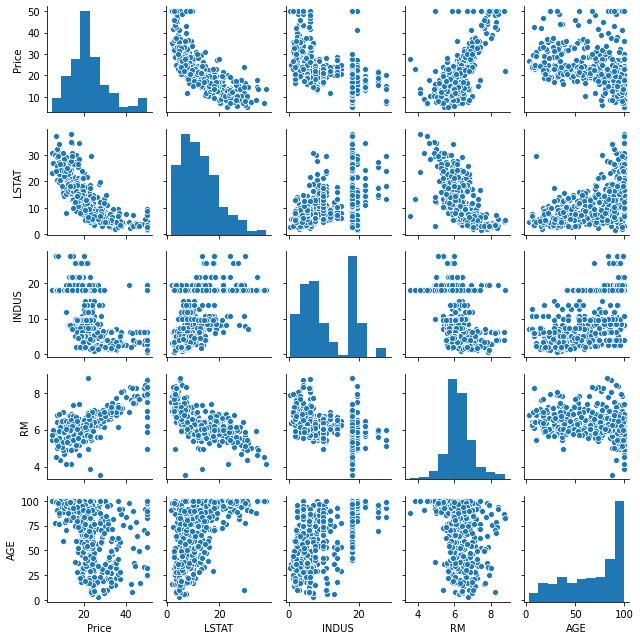

In [ ]:
cols = ['Price', 'LSTAT', 'INDUS', 'RM', 'AGE']
sns.pairplot(df[cols], palette='coolwarm', height=1.8)
plt.tight_layout()

In [ ]:
modelo = LinearRegression()
#Entrenamiento
modelo.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = modelo.predict(X)

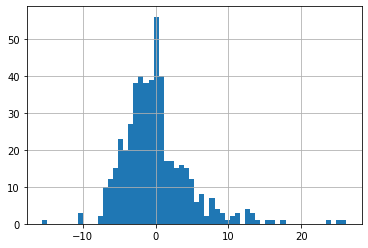

In [ ]:
#Graficar los errores a partir de los valores predecidos
pd.Series(Y-Y_pred).hist(bins=60)

In [ ]:
#Hallamos al intercepto
print(modelo.intercept_)

36.459488385090125


In [ ]:
#Calculamos el error R cuadrado
r2 = r2_score(Y, Y_pred)
print("R2: {:.2}".format(r2))

R2: 0.74


In [ ]:
#Validación cruzada 
from sklearn.model_selection import cross_val_predict
pred_cv = cross_val_predict(modelo, X, Y, cv = 10)

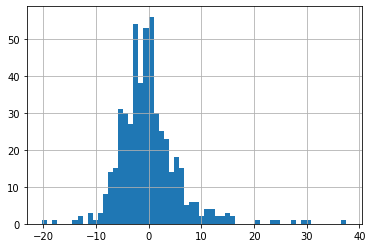

In [ ]:
pd.Series(Y-pred_cv).hist(bins=60)

## 2.5.1. MAE
Media de los valores absolutos de los errores:
$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|$

In [ ]:
#Calculando el MAE
from sklearn.metrics import mean_absolute_error
print(f"MAE: {mean_absolute_error(Y, pred_cv)}")

MAE: 3.9973058525932488


## 2.5.2. MSE
Mean Squared Error:
$$MSE = \sqrt(\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2$$

Es la raíz cuadrada de la media de los errores al cuadrado. 
Este valor nos indica cuán cerca están los valores predecidos de los valores actuales. Procuramos que esta tasa sea muy pequeño. 

In [ ]:
#Calculando el MSE
from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(Y, pred_cv)}")

MSE: 34.539659539993245


# Support Vector Machines
Es un enfoque de clasificación **discriminativo**.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

## 3.1. SVM en una tarea de Clasificación

Creamos un dataset:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


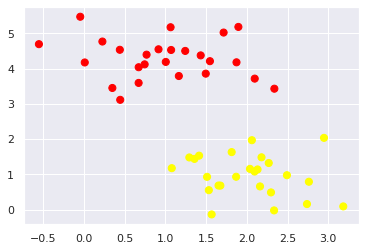

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers = 2, random_state = 0, cluster_std = 0.6)
plt.scatter(X[:,0],X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
xfit = np.linspace(0,20)
print(len(xfit))
for j in range(len(xfit)):
  print(xfit[j])

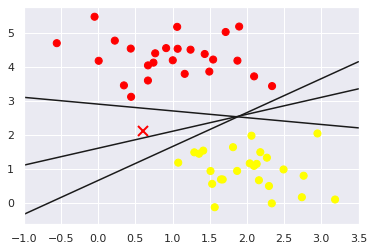

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plt.plot([0.6],[2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m,b in [(1,0.65), (0.5,1.6), (-0.2, 2.9)]:
  plt.plot(xfit,m*xfit+b, '-k')
  plt.xlim(-1,3.5);

Problema de decisión: si agregamos un nuevo dato, dependiendo de la recta que se elija, el resultado será diferente.

## 3.2. Maximización del Margen
- En vez de dibujar una simple línea entre dos clases...
- ... podemos dibujar una línea con una cierta longitud de margen cerca del punto 'X'

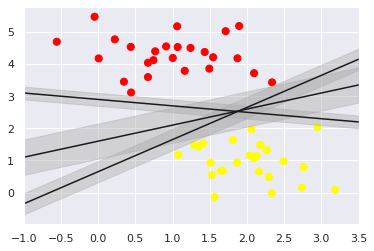

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
#plt.plot([0.6],[2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m,b,d in [(1,0.65,0.33), (0.5,1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m*xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)
  plt.xlim(-1,3.5);

La idea SVM es maximizar el margen. El hiperplano que maximice el margen, será elegido como modelo óptimo.


## 3.3. Ajuste a SVM
Usamos un SVM con un kernel lineal:

In [ ]:
from sklearn.svm import SVC 
modelo = SVC(kernel='linear', C=1E10)
modelo.fit(X,y)

NameError: ignored

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Crear un grid para evaluar el modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    #dibujamos  la frontera de decision y los margenes
    #ax.contour(X,Y,P,color='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.contour(X,Y,P,color='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
    #dibujar vectores de soporte
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, linewidth=1, facecolors='none');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


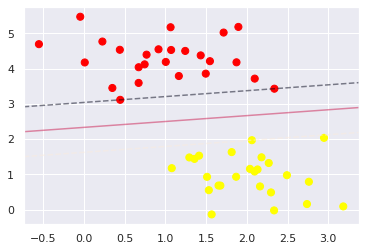

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(modelo);

La línea roja es la que maximiza el margen entre ambas clases.
Los ejemplos de entrenamiento tocan levemente el margen y son llamados **vectores de soporte**, ese término es el que da nombre al algoritmo.

Nosotros podemos identificar los vectores de soporte.

In [ ]:
print("Vectores de soporte: ", modelo.support_vectors_)

Vectores de soporte:  [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


- Para el entrenamiento de SVM, importa la posición de los vectores de soporte
- Cualquier punto o ejemplo que esté lejos del margen, no modifica la fase de entrenamiento.

## 3.4. Kernel SVM
- SVM llega  a ser robusto cuando se combina con kernels.
- Hemos visto una versión de kernel anteriormente en regresión lineal.
- Permite proyectar nuestros datos en un espacio dimensional mayor que el original a través de funciones polinomiales y gausianas.
- Esto sucede cuando los dato no son linealmente separables

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


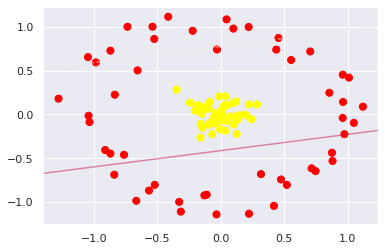

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.svm import SVC
modelo = SVC(kernel='linear', C=1E10)

#Generamos un dataset linealmente no separable
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

- La discriminación lineal no es capaz de separa los datos de la clase amarillas de la roja.
- Podemos proyectar los datos en una dimensión más alta que permita usar un separador lineal sin problemas. 


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
X, y = datasets.load_iris(return_X_y=True)
clf = svm.SVC()
cross_val_score(clf, X,y, cv=5, scoring='recall_macro')

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X,y)
from mpl_toolkits import mplot3d
r = np.exp(-(X**2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
  ax = plt.subplot(projection = '3d')
  ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')


In [ ]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=[-90,90], azip=(-180,180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

### Radial Basis Function


In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


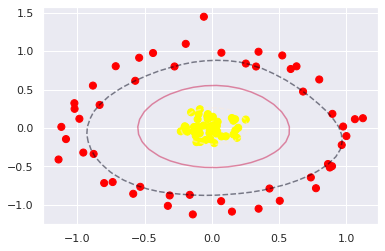

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

## Suavizamiento de Márgenes en SVM
Cuando los datos de dos clases diferentes se superponen, tendríamos problems con nuestros márgenes en SVM.

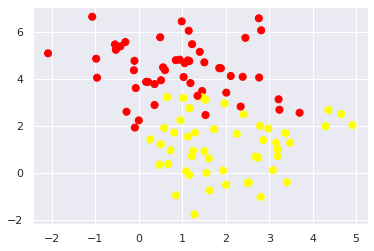

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

El parámetro $C$ se usa para manipular el margen:
- Si $C$ es un valor grande, el margen es duro
- Si $C$ es pequeño, el margen es suave. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


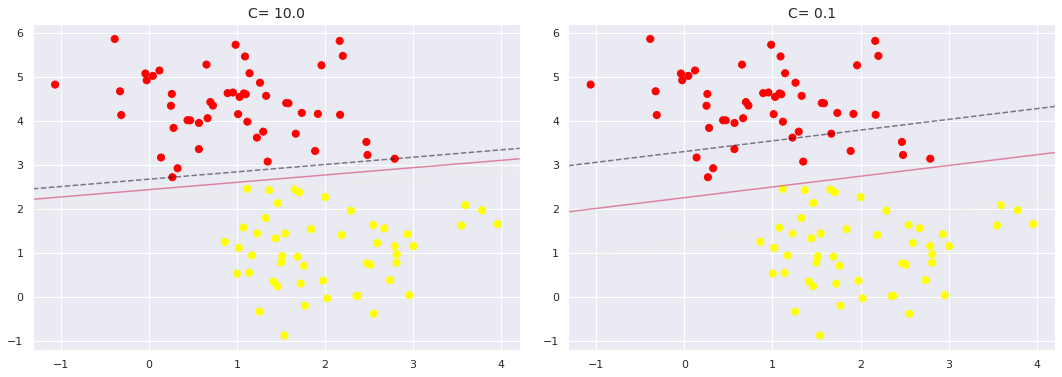

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  modelo = SVC(kernel='linear', C=C).fit(X,y)
  axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
  plot_svc_decision_function(modelo, axi)
  axi.scatter(modelo.support_vectors_[:,0], modelo.support_vectors_[:,1], s=300, lw=1, facecolors='none');
  axi.set_title('C= {0:.1f}'.format(C), size=14)

El valor óptimos del hiperparámetro $C$ depende del dataset.

# Redes Bayesianas

## Probabilidades Marginales, Condicionales y Conjuntas
$$
P(A) = 0.3333
$$

$$
P(B) = 0.25
$$

$$
P(A\cap B) = 0.2
$$

$$
P(A\mid B) = ?
$$

In [ ]:
Pa = 0.3333
Pb = 0.25
Pab = 0.2


$$
P(A\mid B) = \frac{P(A\cap B)}{P(B)}
$$

In [ ]:
Pa_dado_b = Pab/Pb
print("Condicional P(A|B): ", Pa_dado_b)

Condicional P(A|B):  0.8


$$
P(B\mid A) = \frac{P(A\cap B)}{P(A)}
$$

In [ ]:
Pb_dado_a = Pab/Pa
print("Condicional P(B|A): ", Pb_dado_a)

Condicional P(B|A):  0.6000600060006002


## Definiciones principales
### Probabilidad Marginal 
$$
P(A=a) = \frac{M[A=a]}{M}
$$
donde $M$ es el total de instancias en el dataset de entrenamiento.

### Probabilidad Conjunta
$$
P(A=a\cap B=b) = \frac{M[A=a\cap B=b]}{M}
$$

### Probabilidad Condicional
$$
P(A=a\mid B=b) = \frac{P(A=a\cap B=b)}{P(B=b)}
$$

$$
P(A=a\mid B=b) = \frac{\frac{M[A=a\cap B=b]}{M}}{\frac{M[B=b]}{M}}
$$

$$
P(A=a\mid B=b) = \frac{M[A=a\cap B=b]}{M[B=b]}
$$

### Ejemplo: Operador AND

P | Q | P AND Q | RB
--- | --- | --- | ---
0 | 0 | 0 | ?
1 | 0 | 0 | ?
0 | 1 | 0 | ?
1 | 1 | 1 | ?

Mejor, renombramos como:

$X_1$ | $X_2$ | Y | $Y_{pred}$
--- | --- | --- | ---
0 | 0 | 0 | ?
1 | 0 | 0 | ?
0 | 1 | 0 | ?
1 | 1 | 1 | ?


#### ¿Cuál es nuestra hipótesis?

Según la tabla, nosotros sabemos que: 
- cuando P=0, Q=0, entonces P AND Q = 0
- cuando P=1, Q=0, entonces P AND Q = 0
- cuando P=0, Q=1, entonces P AND Q = 0
- cuando P=1, Q=1, entonces P AND Q = 1

In [ ]:
# Instalamos Graphviz
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [ ]:
from graphviz import Digraph
estructura1 = Digraph()
estructura1.edge("Y", "X1")
estructura1.edge("Y", "X2")

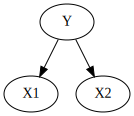

In [ ]:
estructura1

$$
P(Y\mid X_1\cap X_2) \approx P(Y)\times P(X_1\mid Y)\times P(X_2\mid Y)
$$


$X_1$ | $X_2$ | Y | $Y_{pred}$
--- | --- | --- | ---
0 | 0 | 0 | ?
1 | 0 | 0 | ?
0 | 1 | 0 | ?
1 | 1 | 1 | ?


Desarrollando la distribución $P(Y)$:

Y | P(Y)
--- | ---
0 | 0.75
1 | 0.25

Desarrollando la distribución condicional $P(X_1\mid Y)$:

$X_1$ | $Y$ | $P(X_1\mid Y) $
--- | --- | ---
0 | 0 | 0.66667
0 | 1 | 0
1 | 0 | 0.3333
1 | 1 | 1


Desarrollando la distribución condicional $P(X_2\mid Y)$:

$X_2$ | $Y$ | $P(X_2\mid Y) $
--- | --- | ---
0 | 0 | 0.66667
0 | 1 | 0
1 | 0 | 0.3333
1 | 1 | 1

In [ ]:
#Usando la hipótesis
data_X1 = [0,1,0,1]
data_X2 = [0,0,1,1]
data_Y = [0,0,0,1]

P_Y_0 = 0.75
P_Y_1 = 1-P_Y_0


# M[Y=0] = 3
# M[X1=0, X2=0] = 1
# M[X2=0] = 2


Calculando: 
$$
P(X_1 = 0\mid Y=0)
$$

In [ ]:
P_X1_0_dado_Y_0 = 0.667

Caculando: 
$$
P(X_1 = 1 \mid Y = 0)
$$

In [ ]:
P_X1_1_dado_Y_0 = 0.3333 # P

Calculando: 
$$
P(X_1 = 0 \mid Y=1) = \frac{M[X_1=0\cap Y=1]}{M[Y=1]} = \frac{0}{1} = 0
$$

In [ ]:
P_X1_0_dado_Y_1 = 0

Calculando: 
$$
P(X_1 = 1 \mid Y=1)
$$

In [ ]:
P_X1_1_dado_Y_1 = 1 - P_X1_0_dado_Y_1
print(P_X1_1_dado_Y_1)

1


Calculando: 
$$
P(X_2 = 0\mid Y=0) = \frac{M[X_2=0\cap Y=0]}{M[Y=0]} = \frac{2}{3}
$$

In [ ]:
P_X2_0_dado_Y_0 = 2/3
P_X2_1_dado_Y_0 = 1 - P_X2_0_dado_Y_0

Calculando: 
$$
P(X_2=0\mid Y_1) = \frac{M[X_2=0\cap Y=1]}{M[Y=1]} = \frac{0}{1} = 0
$$

In [ ]:
P_X2_0_dado_Y_1 = 0
P_X2_1_dado_Y_1 = 1 - P_X2_0_dado_Y_1


### Haciendo predicciones (inferencia)

Si $X_1 = 0$ y $X_2 = 1$, ¿Cuál es el valor de $Y$? ($X_1$ AND $X_2$)
Y = 0,  es la repuesta real
Y_pred = ?

$$
Y_{pred} = arg max (P(Y\mid X_1, X_2))
$$

Consulta:
$$
P(Y\mid X_1\cap X_2) \approx P(Y)\times P(X_1\mid Y)\times P(X_2\mid Y)
$$

Si instanciamos los datos de test, sabemos que $X_1=0$, $X_2=1$ pero no sabemos cuánto vale $Y$:

- Consulta 1: $$
P(Y=0\mid X_1=0\cap X_2=1) \approx P(Y=0)\times P(X_1=0\mid Y=0)\times P(X_2=1\mid Y=0)
$$
- Consulta 2: $$
P(Y=1\mid X_1=0\cap X_2=1) \approx P(Y=1)\times P(X_1=0\mid Y=1)\times P(X_2=1\mid Y=1)
$$

In [ ]:
Consulta_1 = P_Y_0 * P_X1_0_dado_Y_0 * P_X2_1_dado_Y_0 #preguntamos por Y=0
Consulta_2 = P_Y_1 * P_X1_0_dado_Y_1 * P_X2_1_dado_Y_1  #preguntamos por Y=1
print("Esta es la probabilidad de que Y=0, considerando X1=0 y X2=1: ",Consulta_1)
print("Esta es la probabilidad de que Y=1, considerando X1=0 y X2=1: ",Consulta_2)

Esta es la probabilidad de que Y=0, considerando X1=0 y X2=1:  0.16675000000000004
Esta es la probabilidad de que Y=1, considerando X1=0 y X2=1:  0.0


Por lo tanto, clasificamos a este caso de test como: 
$$
Y_{pred} = 0
$$

Cuando la variable target (clase) es la única que condiciona a todas las variables sin excepción, entonces hablamos de: Naive Bayes.

Pero también podríamos tener otra hipótesis que no necesariamente es Naive Bayes:

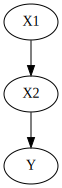

In [ ]:
estructura2 = Digraph()
estructura2.edge("X2", "Y")
estructura2.edge("X1", "X2")
estructura2

$$
P(Y\mid X_1\cap X_2) \approx P(X_1)\times P(X_2\mid X_1) \times P(Y\mid X_2)
$$

##Redes Bayesianas en Sklearn

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


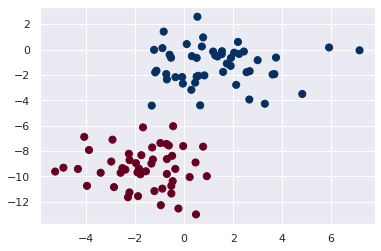

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu');

In [ ]:
type(y)

numpy.ndarray

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X,y);

Ahora generamos datos de test:

In [ ]:
rng = np.random.RandomState(0)
X_test = [-6,-14] + [14,18]*rng.rand(2000,2)
y_test = modelo.predict(X_test)


In [ ]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

Podemos graficar la frontera de decisión:

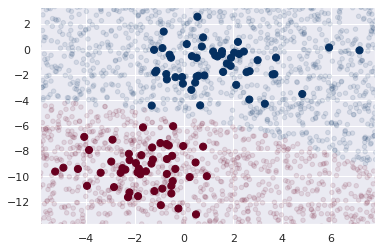

In [ ]:
plt.scatter(X[:,0] ,X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
print(len(y_test))

2000


In [ ]:
yprob = modelo.predict_proba(X_test)
print(len(yprob))


2000


In [ ]:
#revisamos las últimas 8 probabilidades:
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [ ]:
yprob[1999][0].round(2)

0.15

In [ ]:
y_test[-8:]

array([0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
tam = len(y_test)
print("ID\tProbY0\tProbY1\tYpred")
for i in range(tam):
  print("{}\t{}\t{}\t{}".format((i+1),yprob[i][0].round(2), yprob[i][1].round(2), y_test[i]))

In [ ]:
# the functions below grabbed from http://www.astroml.org/book_figures/appendix/fig_neural_network.html
# our standard imports: matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')
radius = 0.3

arrow_kwargs = dict(head_width=0.05, fc='black')

def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fill=False, lw=2)
    ax.add_patch(circ)

In [ ]:
# based on borrowed function we can create a new one to draw NN

def draw_net(input_size, output_size, hidden_layers=[], w=6, h=4):
  """Draw a network"""
  x = 0  # initial layer position

  ax = plt.subplot()
  ax.set_aspect('equal')
  ax.axis('off')

  ax.set_xlim([-2, -2 + w])
  ax.set_ylim([-h / 2 , h / 2 + 1])

  # set y position  
  y_input = np.arange(-(input_size - 1) / 2, (input_size + 1) / 2, 1)
  y_output = np.arange(-(output_size - 1) / 2, (output_size + 1) / 2, 1)
  y_hidden = [np.arange(-(n - 1) / 2, (n + 1) / 2, 1) for n in hidden_layers]

  # draw input layer
  plt.text(x, h / 2 + 0.5, "Input\nLayer", ha='center', va='top', fontsize=16)

  for i, y in enumerate(y_input):
    draw_circle(ax, (x, y), radius)
    ax.text(x - 0.9, y, '$x_%i$' % (input_size - 1 - i),
            ha='right', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x - 0.9, y), 0.1, (x, y), radius)

  last_layer = y_input  # last layer y positions

  # draw hidden layers
  for ys in y_hidden:
    # shift x
    x += 2
    plt.text(x, h / 2 + 0.5, "Hidden\nLayer", ha='center', va='top', fontsize=16)

    # draw neurons for each hidden layer
    for i, y1 in enumerate(ys):
      draw_circle(ax, (x, y1), radius)

      # connect a neuron with all neurons from previous layer
      if i != len(ys) - 1: # skip bias
        for y2 in last_layer:
          draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)

    # update last layer
    last_layer = ys

  x += 2  # update position for output layer

  # draw output layer
  plt.text(x, h / 2 + 0.5, "Output\nLayer", ha='center', va='top', fontsize=16)

  for i, y1 in enumerate(y_output):
    draw_circle(ax, (x, y1), radius)
    ax.text(x + 0.8, y1, 'Output', ha='left', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x, y1), radius, (x + 0.8, y1), 0.1)

    # connect each output neuron with all neurons from previous layer
    for y2 in last_layer:
      draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)

# Redes Neuronales

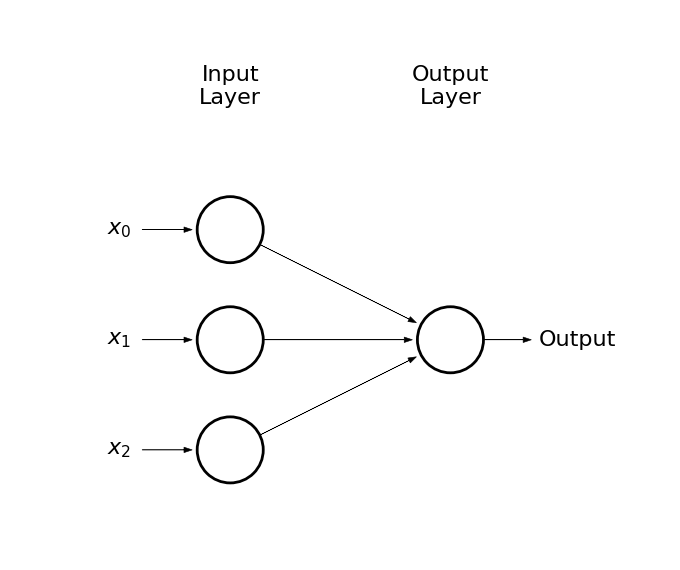

In [ ]:
draw_net(3, 1)

## Caso de Personas Sanas/Enfermas
Síntomas:
- Mareos ($X_1$)
- Dolor muscular ($X_2$)
- Fiebre ($X_3$)

Clase (diagnóstico) ($Y$):
- Sana
- Enferma

$$
X = \{X_1, X_2, X_3\}
$$

donde cada feature es binario:

$X_1 = \{\text{No tiene mareos}, \text{Tiene mareos}\} = \{0, 1\}$

$X_2 = \{\text{No tiene dolor}, \text{Tiene dolor}\} = \{0,1 \}$

$X_3 = \{\text{No tiene fiebre}, \text{Tiene fiebre}\} = \{0, 1\}$

$Y = \{\text{Sano}, \text{Enfermo}\} = \{0, 1\}$

### Construcción del dataset de entrenamiento

ID | Mareos | Dolor muscular | Fiebre | Estado
--- | --- | --- | --- | ---
1 | No | No | Sí | Enfermo
2 | Sí | No | No | Sano
3 | No | Sí | No | Sano
4 | Sí | Sí | Sí | Enfermo
5 | No | Sí | Sí | Enfermo

Convertimos nuestro dataset de entrenamiento a vectores numéricos.
Este es nuestro dataset de entrenamiento $d_{ent}$:

ID | $X_1$ | $X_2$ | $X_3$ | Y
--- | --- | --- | --- | ---
1 | 0 | 0 | 1 | 1
2 | 1 | 0 | 0 | 0
3 | 0 | 1 | 0 | 0 
4 | 1 | 1 | 1 | 1 
5 | 0 | 1 | 1 | 1

## Construcción del dataset de test

ID | Mareos | Dolor muscular | Fiebre | Estado | RNA
--- | --- | --- | --- | --- | ---
1 | Sí | No | Sí | Enfermo | ?
2 | No | No | No | Sano | ?


Si convertimos nuestro datase de test a vectores numéricos. Este es nuestro dataset de test $d_{test}$:

ID | $X_1$ | $X_2$ | $X_3$ | Y
--- | --- | --- | --- | ---
1 | 1 | 0 | 1 | 1
2 | 0 | 0 | 0 | 0

tenemos que $d_{ent}\cap d_{test} = \emptyset$

In [ ]:
# Dataset de entrenamiento
d_ent = [
         {'X':[0,0,1], 'Y':1}, #ID 1
         {'X':[1,0,0], 'Y':0}, #ID 2
         {'X':[0,1,0], 'Y':0}, #ID 3
         {'X':[1,1,1], 'Y':1}, #ID 4
         {'X':[0,1,1], 'Y':1}, #ID 1
]

In [ ]:
print(d_ent)

[{'X': [0, 0, 1], 'Y': 1}, {'X': [1, 0, 0], 'Y': 0}, {'X': [0, 1, 0], 'Y': 0}, {'X': [1, 1, 1], 'Y': 1}, {'X': [0, 1, 1], 'Y': 1}]


In [ ]:
for ejemplo in d_ent:
  print(ejemplo)

{'X': [0, 0, 1], 'Y': 1}
{'X': [1, 0, 0], 'Y': 0}
{'X': [0, 1, 0], 'Y': 0}
{'X': [1, 1, 1], 'Y': 1}
{'X': [0, 1, 1], 'Y': 1}


In [ ]:
tam = len(d_ent)
print("X\t\tY")
for i in range(tam):
  X = d_ent[i]['X']
  Y = d_ent[i]['Y']
  print("{}\t{}".format(X,Y))

X		Y
[0, 0, 1]	1
[1, 0, 0]	0
[0, 1, 0]	0
[1, 1, 1]	1
[0, 1, 1]	1


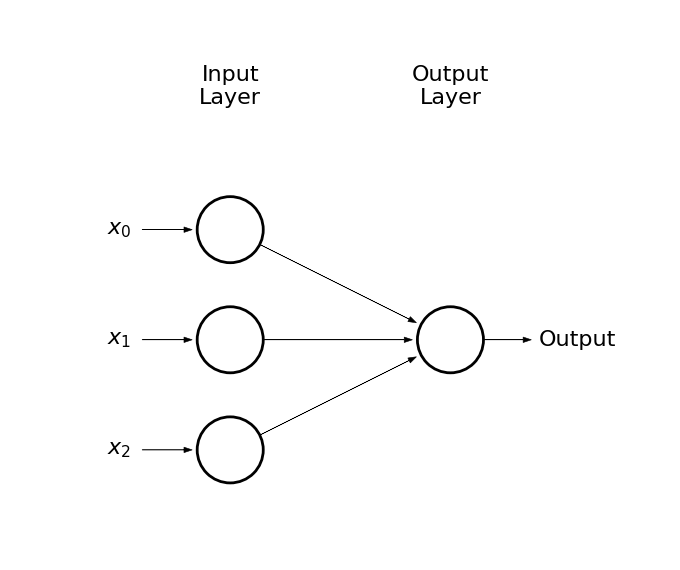

In [ ]:
draw_net(3,1)

## Construcción de RNA: Pesos

$W = \{w_0, w_1, w_2\}$

In [ ]:
import math
import random

u = random.uniform(-1,1)
print(u)

0.7055312887861607


In [ ]:
print(random.uniform(-1,1))

print(random.uniform(-1,1))

-0.48663235285591555
0.07880538902906697


In [ ]:
w0 = random.uniform(-1,1)
w1 = random.uniform(-1,1)
w2 = random.uniform(-1,1)

W = [w0, w1, w2]
print(W)

[0.3706589673199081, -0.5940060694758718, -0.3409712453022815]


## Ensamble 1: ensamblando los pesos en la RNA

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

## Sumatoria ($\sum$) de pesos versus entradas

$$
\sum_{i} w_i \times X_i
$$

En este caso particular, tendríamos:
$$
\sum_{i} w_i \times X_i = w_1 \times X_1 + w_2 \times X_2 + w_3 \times X_3 
$$

In [ ]:
for indice, Xi in enumerate(d_ent[0]['X']):
  print("Indice={}\tXi={}".format(indice, Xi))

Indice=0	Xi=0
Indice=1	Xi=0
Indice=2	Xi=1


## Ensamble 2: ensamblando la función sumatoria en la RNA


In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

## Construcción de la Función de Activación
En este caso, usaremos la función sigmoidal, la cual se basa en el valor de Euler:

In [ ]:
from math import e
print(e)

2.718281828459045


La función sigmoide:
$$
\phi(z) = \frac{1}{1+e^{-z}}
$$

In [ ]:
import math 
def sigmoide(x):
  a = []
  for z in x:
    a.append(1/(1+math.exp(-z)))
  return a  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5., 5., 0.2)
sig = sigmoide(x)

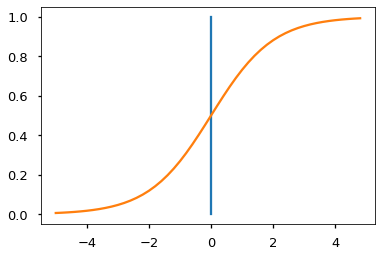

In [ ]:
#Graficamos
Yaxis_linea = np.linspace(0,1,2)
Xaxis_linea = [0]*len(Yaxis_linea)
plt.plot(Xaxis_linea, Yaxis_linea)

plt.plot(x,sig)
plt.show()

### Función de activación:
$$
FA = \frac{1}{1+e^{-\sum w_i x_i}}
$$

Otras funciones de activación:


In [ ]:
def binario(x): return 0 if x < 0 else 1
def identidad(x): return x
def tanh(x): return math.tanh(x)
def logistica(x): return 1/(1+math.exp(-x))
def relu(x): return 0 if x<0 else x

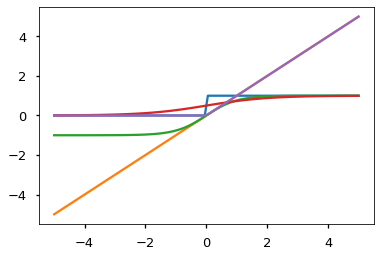

In [ ]:
x = np.linspace(-5,5,100)
bs = [binario(i) for i in x]
ident = [identidad(i) for i in x]
tn = [tanh(i) for i in x]
lg = [logistica(i) for i in x]
rl = [relu(i) for i in x]

plt.plot(x, bs)
plt.plot(x, ident)
plt.plot(x, tn)
plt.plot(x, lg)
plt.plot(x, rl)

### Ensambe 3: ensamblando la función de activación en la RNA

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    

### Ensamble 4: ensamblando la función "predict()" (Fase Test)

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma)
    return y_proba

### Ensamble 5: ensamblando la función "fit()" (Fase Entrenamiento)

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma)
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba

## Ensamble 6: ensamblando la gradiente 
$$
Gradiente = y_{proba}\times (1-y_{proba})
$$

In [ ]:
def gradiente(proba):
  return proba*(1-proba)

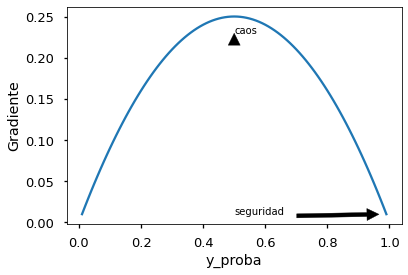

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
p = np.arange(0.01, 1.0, 0.01)
plt.xlabel('y_proba')
plt.ylabel('Gradiente')
plt.annotate('caos', xy=(0.5,0.23), xytext=(0.5,0.23), arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('seguridad', xy=(1,0.01), xytext=(0.5,0.01), arrowprops=dict(facecolor='black', shrink=0.1))
plt.plot(p,gradiente(p));


In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma)
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)
    

### Ensamble 7: ajuste de los pesos de la neurona



In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma)
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba
        #Aplicamos la gradiente para ajuste de los pesos
        for indice in range(len(self.W)):
          xi = X[indice]
          self.W[indice] = self.W[indice] + xi*error*self.__gradiente(y_proba)

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)
    

Probando nuestra neurona:

In [ ]:
# Dataset de entrenamiento
d_ent = [
         {'X':[0,0,1], 'Y':1}, #ID 1
         {'X':[1,0,0], 'Y':0}, #ID 2
         {'X':[0,1,0], 'Y':0}, #ID 3
         {'X':[1,1,1], 'Y':1}, #ID 4
         {'X':[0,1,1], 'Y':1}, #ID 1
]

In [ ]:
#Fase de entrenamiento
num_epocas = 2
neurona1 = Neurona()
neurona1.fit(d_ent, num_epocas)


In [ ]:
# Dataset de test
d_test = [
         {'X':[1,0,1], 'Y':1}, #ID 1
         {'X':[0,0,0], 'Y':0} #ID 2
]

$d_{test}$:

ID | $X_1$ | $X_2$ | $X_3$ | Y
--- | --- | --- | --- | ---
1 | 1 | 0 | 1 | 1
2 | 0 | 0 | 0 | 0

In [ ]:
#Fase de test
print("y_proba\ty_pred\ty_real")
for ejemplo_test in d_test:
  X = ejemplo_test['X']
  y_real = ejemplo_test['Y']
  y_proba = neurona1.predict(X)
  print("{:.3f}\t{:.0f}\t{}".format(y_proba, y_proba, y_real))

y_proba	y_pred	y_real
0.505	1	1
0.500	0	0


¿$y_{proba} = 0.5$ es **sano** ó **enfermo**?

##Ensamble 8: inclusión del bias en la neurona


In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]
    self.bias = random.uniform(-1,1)

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma) + self.bias
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba
        #Aplicamos la gradiente para ajuste de los pesos
        for indice in range(len(self.W)):
          xi = X[indice]
          self.W[indice] = self.W[indice] + xi*error*self.__gradiente(y_proba)
        self.bias += error*self.__gradiente(y_proba)

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)
    

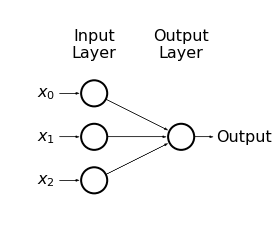

In [ ]:
draw_net(3,1)

## Revisando la recta de la neurona:
Si asumimos que tenemos solo 2 features, tendríamos entonces:
$$
w_1 \times X_1 + w_2 \times X_2 + \theta = 0
$$

En dos dimensiones, nuestro hiperplano es una recta:
$$
X_2 = -\frac{w_1}{w_2}X_1-\frac{\theta}{w_2}
$$

donde:
- pendiente: $-\frac{w_1}{w_2}$
- intercepto: $-\frac{\theta}{w_2}$

Para poder evaluar mejor esta situación, reduzcamos el número de features a 2.


In [ ]:
# Dataset de entrenamiento
d_ent = [
         {'X':[0,1], 'Y':1}, #ID 1
         {'X':[1,0], 'Y':0}, #ID 2
         {'X':[0,0], 'Y':0}, #ID 3
         {'X':[1,1], 'Y':1}, #ID 4
         {'X':[0,1], 'Y':1}, #ID 1
]

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    self.W = [w0, w1]
    self.bias = random.uniform(-1,1)

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma) + self.bias
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba
        #Aplicamos la gradiente para ajuste de los pesos
        for indice in range(len(self.W)):
          xi = X[indice]
          self.W[indice] = self.W[indice] + xi*error*self.__gradiente(y_proba)
        self.bias += error*self.__gradiente(y_proba)

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)
    

In [ ]:
neurona2 = Neurona()
neurona2.fit(d_ent, 2)

In [ ]:
# Dataset de test
d_test = [
         {'X':[1,1], 'Y':1}, #ID 1
         {'X':[0,0], 'Y':0} #ID 2
]

In [ ]:
#Fase de test
print("y_proba\ty_pred\ty_real")
for ejemplo_test in d_test:
  X = ejemplo_test['X']
  y_real = ejemplo_test['Y']
  y_proba = neurona2.predict(X)
  print("{:.3f}\t{:.0f}\t{}".format(y_proba, y_proba, y_real))

y_proba	y_pred	y_real
0.859	1	1
1.068	1	0


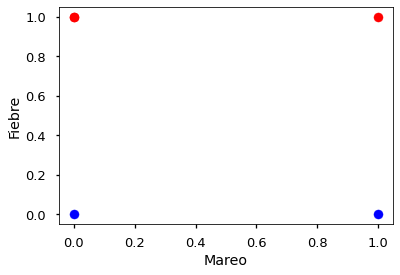

In [ ]:
# Dataset de entrenamiento
d_ent = [
         {'X':[0,1], 'Y':1}, #ID 1
         {'X':[1,0], 'Y':0}, #ID 2
         {'X':[0,0], 'Y':0}, #ID 3
         {'X':[1,1], 'Y':1}, #ID 4
         {'X':[0,1], 'Y':1}, #ID 1
]

plt.xlabel("Mareo")
plt.ylabel("Fiebre")
plt.scatter([0,1,0 ],[1,1,1 ], color='r')
plt.scatter([1,0 ],[0,0 ], color='b')

In [ ]:
neurona2 = Neurona()
pesso_antiguos = neurona2.W.copy()
bias_antiguo = neurona2.bias
neurona2.fit(d_ent, 2)
print("Antiguos pesos:", pesso_antiguos)
print("Nuevos pesos:", neurona2.W)
print("Bias antiguo: ", bias_antiguo)
print("Bias nuevo: ", neurona2.bias)

Antiguos pesos: [0.24982691872791118, 0.861289873430356]
Nuevos pesos: [0.14281431549444967, 1.1948018558803117]
Bias antiguo:  0.2061263849638768
Bias nuevo:  0.0044007223323113825


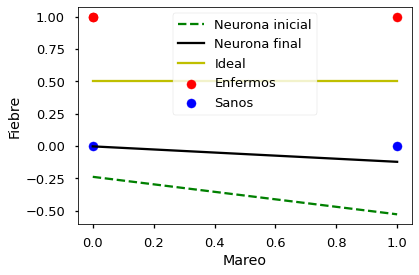

In [ ]:
plt.xlabel("Mareo")
plt.ylabel("Fiebre")
plt.scatter([0,1,0 ],[1,1,1 ], color='r', label='Enfermos')
plt.scatter([1,0 ],[0,0 ], color='b', label='Sanos')

m, b = -1*(pesso_antiguos[0]/pesso_antiguos[1]), -1*(bias_antiguo/pesso_antiguos[1])
x = np.linspace(0,1,10)
plt.plot(x, x*m+b, '--', color='g', label='Neurona inicial')

m, b = -1*(neurona2.W[0]/neurona2.W[1]), -1*(neurona2.bias/neurona2.W[1])
x = np.linspace(0,1,10)
plt.plot(x, x*m+b, color='k', label='Neurona final')

plt.plot(x, [0.5]*len(x), color='y', label='Ideal')

plt.legend()


## Un caso de aplicación con Redes Neuronales


In [ ]:
import io
import pandas as pd
from google.colab import files
subido = files.upload()
pima = pd.read_csv(io.BytesIO(subido['diabetes.csv']))



Saving diabetes.csv to diabetes.csv


In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]

from sklearn.preprocessing import StandardScaler
estandarizacion = StandardScaler().fit_transform(X)
X2 = pd.DataFrame(data=estandarizacion, columns=X.columns)
X2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


Neurona:

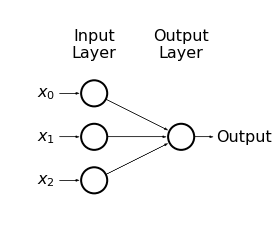

In [ ]:
draw_net(3,1)

In [ ]:
from google.colab import data_table
data_table.DataTable(X2)

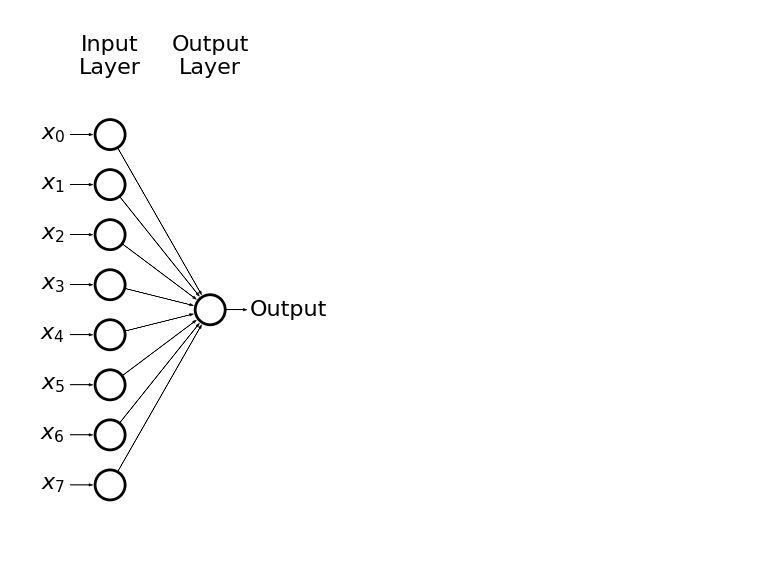

In [ ]:
draw_net(8,1, w=15, h=10)

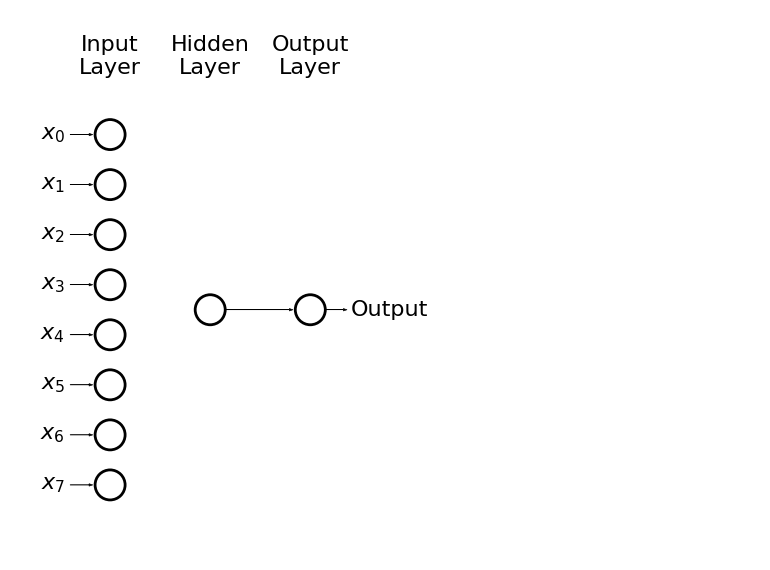

In [ ]:
draw_net(8,1,[1], w=15, h=10)

## Comprendiendo mejor nuestra arquitectura de RNA

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)

In [ ]:
red_neuronal1 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1, learning_rate_init=0.3, activation='logistic')
red_neuronal1.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
red_neuronal1.coefs_

[array([[-1.3794701 ],
        [-0.71309196],
        [-0.84848491],
        [-0.04103717],
        [-0.71768651],
        [-1.20700937],
        [-0.99076276],
        [-1.45749807]]), array([[-1.49903808]])]

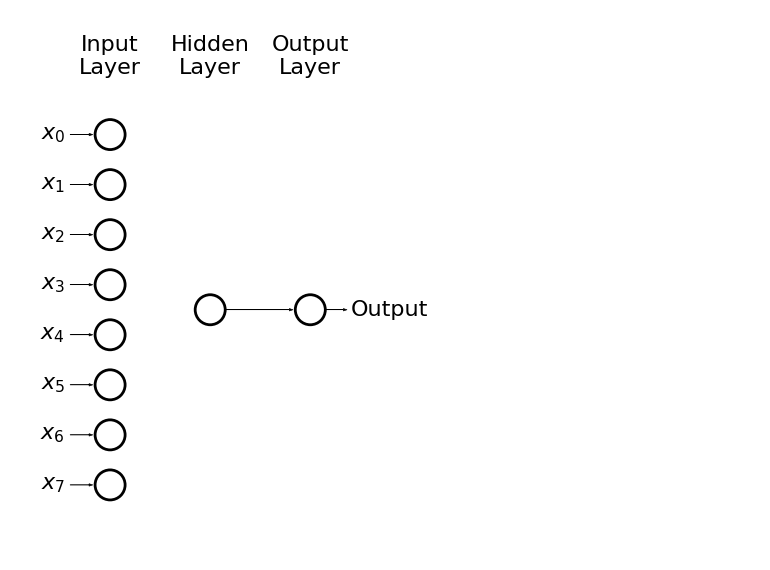

In [ ]:
draw_net(8,1,[1], w=15, h=10)

In [ ]:
red_neuronal1.intercepts_

[array([-0.41545812]), array([0.60029642])]

### Probando su desempeño

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k=10
kfold = KFold(n_splits = k)
cv_resultado1 = cross_val_score(red_neuronal1, X_train, Y_train, cv=kfold, scoring='f1_macro')
print(cv_resultado1)

[0.39805825 0.42056075 0.39805825 0.37113402 0.7218845  0.41346154
 0.37755102 0.37755102 0.37113402 0.40776699]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc

In [ ]:
for i in range(len(cv_resultado1)):
  print("F1 en {} fold = {:.2f}".format(i+1, cv_resultado1[i]))

F1 en 1 fold = 0.40
F1 en 2 fold = 0.42
F1 en 3 fold = 0.40
F1 en 4 fold = 0.37
F1 en 5 fold = 0.72
F1 en 6 fold = 0.41
F1 en 7 fold = 0.38
F1 en 8 fold = 0.38
F1 en 9 fold = 0.37
F1 en 10 fold = 0.41


In [ ]:
import numpy as np
promedio = np.mean(cv_resultado1)
print("promedio: ", promedio)

promedio:  0.4257160361804404


{'boxes': [<matplotlib.lines.Line2D at 0x7ff6e3c9b9e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff6e3d0c470>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6e3d0c518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6e3d0c8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff6e3c9b198>,
  <matplotlib.lines.Line2D at 0x7ff6e3c9bd68>]}

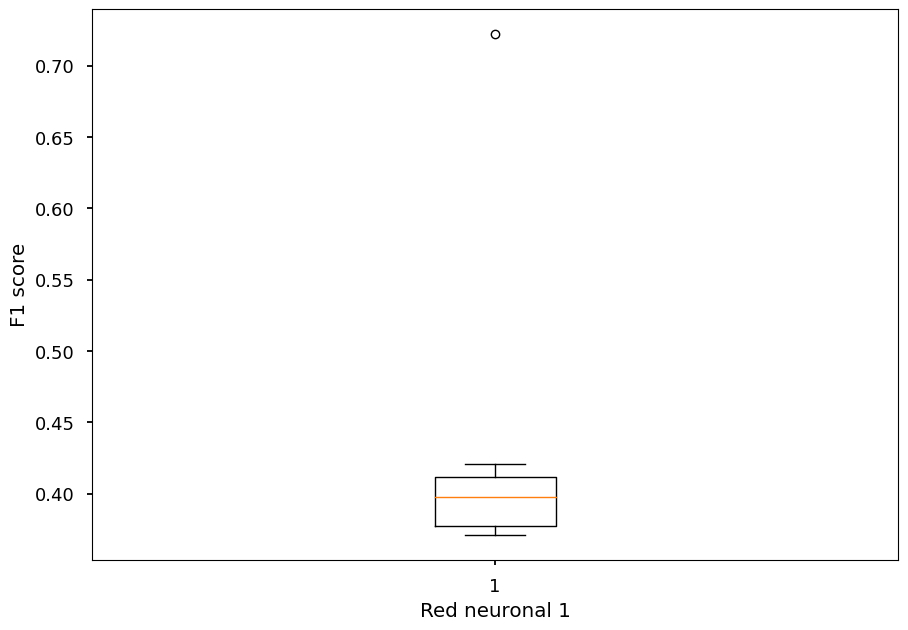

In [ ]:
plt.xlabel('Red neuronal 1')
plt.ylabel('F1 score')
plt.boxplot(cv_resultado1)

## Construyamos otra red neuronal

In [ ]:
red_neuronal2 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=10, learning_rate_init=0.1, activation='logistic')
red_neuronal2.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
red_neuronal2.coefs_

[array([[-0.68423026,  0.17656424,  0.06044429,  0.28466719,  0.24288988,
          0.05044081, -0.64785158, -0.11983387],
        [-2.48167052,  1.63757932, -2.15249379,  2.20257282,  1.55780409,
          1.5961099 , -1.76384665, -1.5071903 ],
        [ 0.18478991,  0.18987009,  0.56331463, -0.59408198,  0.25322099,
         -0.0047816 ,  0.86956004,  0.22312363],
        [ 0.28108221,  0.37282162,  0.30838087, -0.08182556,  0.86079995,
          0.3642728 , -0.0634191 , -0.0063362 ],
        [ 0.78219724,  0.27293238,  0.31159362, -0.58841756,  0.88649273,
          0.02820225,  0.44782527, -0.34954829],
        [-0.15556655,  1.31513178, -1.3323564 ,  0.55661954,  0.80871695,
          0.98714687, -0.71704745, -1.1487968 ],
        [-0.17904335,  0.69177249, -0.69394179,  0.36392831,  0.74537555,
          0.77423515,  0.04371959, -0.6695852 ],
        [-1.77011295,  0.4341218 , -0.90272708,  0.46792723, -0.39303567,
          0.4206447 , -1.3223602 , -0.61857397]]), array([[-1.091

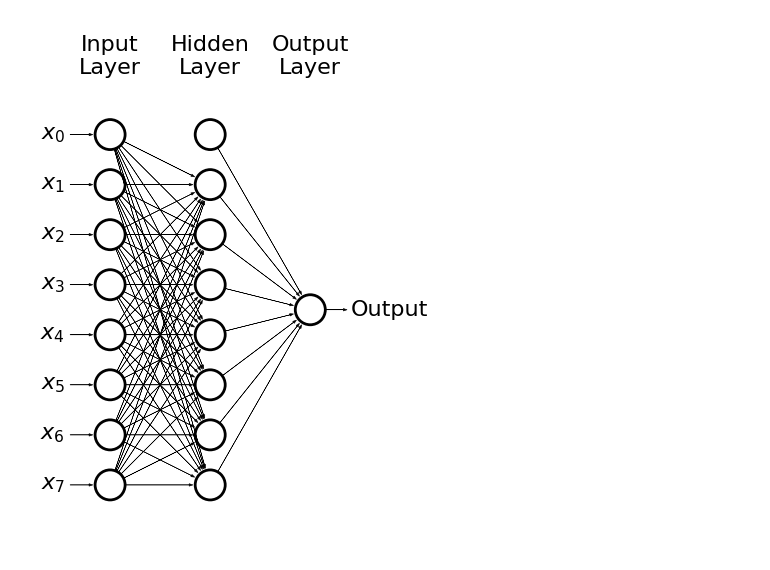

In [ ]:
draw_net(8,1,[8],w=15, h=10)

### Evaluando el desempeño

In [ ]:
k = 10
cv_resultado2 = cross_val_score(red_neuronal2, X_train, Y_train, cv=kfold, scoring='f1_macro')


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

In [ ]:
for i in range(len(cv_resultado2)):
  print("Fold[{}] = {:.2f} (f-measure)".format(i+1, cv_resultado2[i]))

Fold[1] = 0.76 (f-measure)
Fold[2] = 0.65 (f-measure)
Fold[3] = 0.84 (f-measure)
Fold[4] = 0.62 (f-measure)
Fold[5] = 0.78 (f-measure)
Fold[6] = 0.76 (f-measure)
Fold[7] = 0.73 (f-measure)
Fold[8] = 0.75 (f-measure)
Fold[9] = 0.68 (f-measure)
Fold[10] = 0.78 (f-measure)


In [ ]:
promedio2 = np.mean(cv_resultado2)
print("Promedio2: ", promedio2)

Promedio2:  0.7351326322389636


# Comparación de Arquitecturas de RNAs

ID | capas escondidas | épocas | tasa aprendizaje | $\alpha$ | F1 (10-fold cv)
--- | --- | --- | --- | --- | ---
1 | (1) | 1 | 0.3 |  | 0.426
2 | (8) | 10 | 0.1 |  | 0.735
3 | (1) | 1000 | 0.001 |  | 0.679
4 | (8) | 1000 | 0.001 |  | 0.718
5 | (8) | 100000 | 0.1 |  | 0.687
51 | (8) | 100000 | 0.1 | 1.0 | 0.72

In [ ]:
red_neuronal3 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000, learning_rate_init=0.001, activation='logistic')
cv_resultado3 = cross_val_score(red_neuronal3, X_train, Y_train, cv=kfold, scoring='f1_macro')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
promedio3 = np.mean(cv_resultado3)
print("promedio3: ", promedio3)

promedio3:  0.6797507438977581


In [ ]:
red_neuronal4 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, learning_rate_init=0.001, activation='logistic')
cv_resultado4 = cross_val_score(red_neuronal4, X_train, Y_train, cv=kfold, scoring='f1_macro')
promedio4 = np.mean(cv_resultado4)

In [ ]:
print("promedio4: ", promedio4)

promedio4:  0.7181902438989824


In [ ]:
red_neuronal5 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=100000, learning_rate_init=0.1, activation='logistic')
cv_resultado5 = cross_val_score(red_neuronal5, X_train, Y_train, cv=kfold, scoring='f1_macro')
promedio5 = np.mean(cv_resultado5)
print("promedio5: ", promedio5)

promedio5:  0.6870798732857277


In [ ]:
red_neuronal5.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=100000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
red_neuronal5.coefs_

[array([[-0.29693396,  1.3532087 ,  0.9997332 , -4.57884434,  2.28666741,
          2.42731416,  0.06879202, -0.40740897],
        [-4.08563255,  2.65983681, -2.48668345,  1.28248079, -3.12755285,
          1.20052028,  3.92680788, -2.9898396 ],
        [-0.77916511,  2.06245556,  2.79962955, -0.32598759,  1.62894433,
          1.05847114,  1.14217095,  2.21281499],
        [-0.15283542,  1.41817505, -0.42681371,  0.34383036,  0.83284968,
          0.21074906, -4.18463935, -3.31478414],
        [-0.87011726,  3.69614078, -0.46808757, -1.51592419, -1.44730965,
          2.13922988, -3.97508352,  1.69527878],
        [-4.64603255,  3.5595566 ,  3.44858728, -6.49888598, -2.43976888,
          2.40396225, -1.11914997, -0.44174172],
        [ 0.78107898,  2.34314429, -2.51882785,  3.03690948, -3.94697768,
          0.68022377,  0.73820963, -1.28499115],
        [ 2.5932    , -1.96117117, -3.52068017,  5.00805512, -4.05101796,
         -2.93142003,  4.4636946 , -4.62703781]]), array([[-1.389

In [ ]:
pesos_5 = [z for x in red_neuronal5.coefs_ for y in x for z in y]
for i in range(len(pesos_5)):
  print("Peso[{}] = {}".format(i+1, pesos_5[i]))

Peso[1] = -0.29693396056694377
Peso[2] = 1.3532086961072356
Peso[3] = 0.9997332044278469
Peso[4] = -4.5788443434729835
Peso[5] = 2.2866674118795465
Peso[6] = 2.427314156924164
Peso[7] = 0.06879201864306493
Peso[8] = -0.40740896884771954
Peso[9] = -4.085632549652585
Peso[10] = 2.6598368095506757
Peso[11] = -2.4866834502344926
Peso[12] = 1.282480793272895
Peso[13] = -3.1275528535847847
Peso[14] = 1.200520280915851
Peso[15] = 3.9268078768751247
Peso[16] = -2.98983960310357
Peso[17] = -0.77916511310831
Peso[18] = 2.062455560902549
Peso[19] = 2.799629546186314
Peso[20] = -0.3259875910049
Peso[21] = 1.6289443300095514
Peso[22] = 1.0584711425835571
Peso[23] = 1.1421709530588533
Peso[24] = 2.212814992463763
Peso[25] = -0.1528354234919333
Peso[26] = 1.4181750469526686
Peso[27] = -0.4268137124741527
Peso[28] = 0.34383036323204297
Peso[29] = 0.8328496818437611
Peso[30] = 0.21074905635833238
Peso[31] = -4.184639352744766
Peso[32] = -3.3147841413485204
Peso[33] = -0.8701172631850098
Peso[34] = 3.69

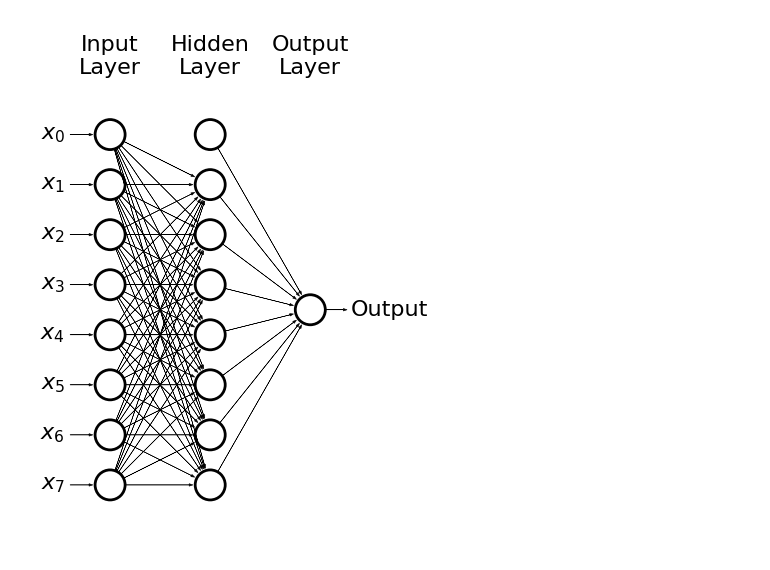

In [ ]:
draw_net(8,1,[8], w=15, h=10)

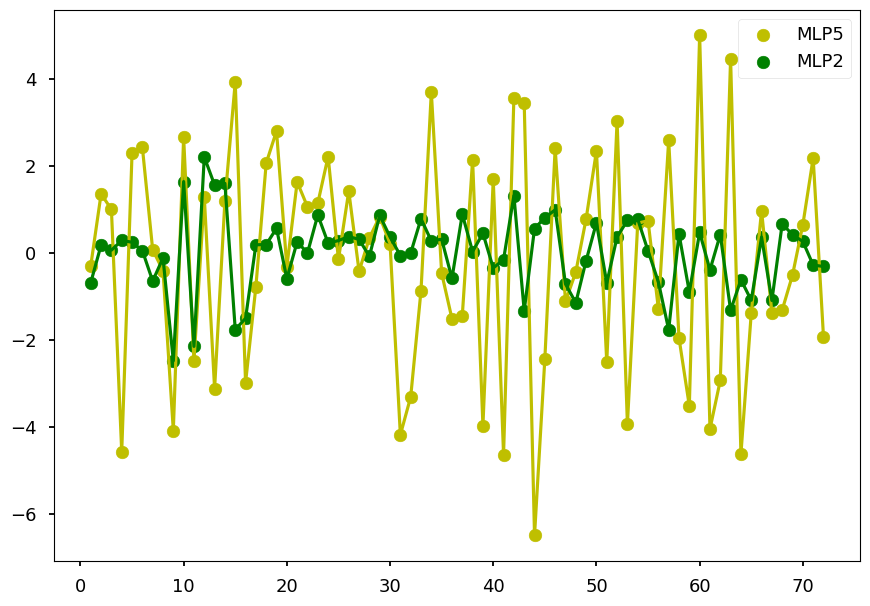

In [ ]:
pesos_2 = [z for x in red_neuronal2.coefs_ for y in x for z in y]

x = np.linspace(1,len(pesos_5),len(pesos_5))
plt.scatter(x,pesos_5, color='y', label='MLP5')
plt.plot(x,pesos_5, color='y')

plt.scatter(x,pesos_2, color='g', label='MLP2')
plt.plot(x,pesos_2, color='g')
plt.legend()

# Regularización de Pesos en la RNA

In [ ]:
red_neuronal51 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=100000, learning_rate_init=0.1, activation='logistic', alpha=1.0)
cv_resultado51 = cross_val_score(red_neuronal51, X_train, Y_train, cv=kfold, scoring='f1_macro')
promedio51 = np.mean(cv_resultado51)
print("promedio51: ", promedio51)

promedio51:  0.723338805744533


In [ ]:
red_neuronal51.fit(X_train, Y_train)
pesos_51 = [z for x in red_neuronal51.coefs_ for y in x for z in y]

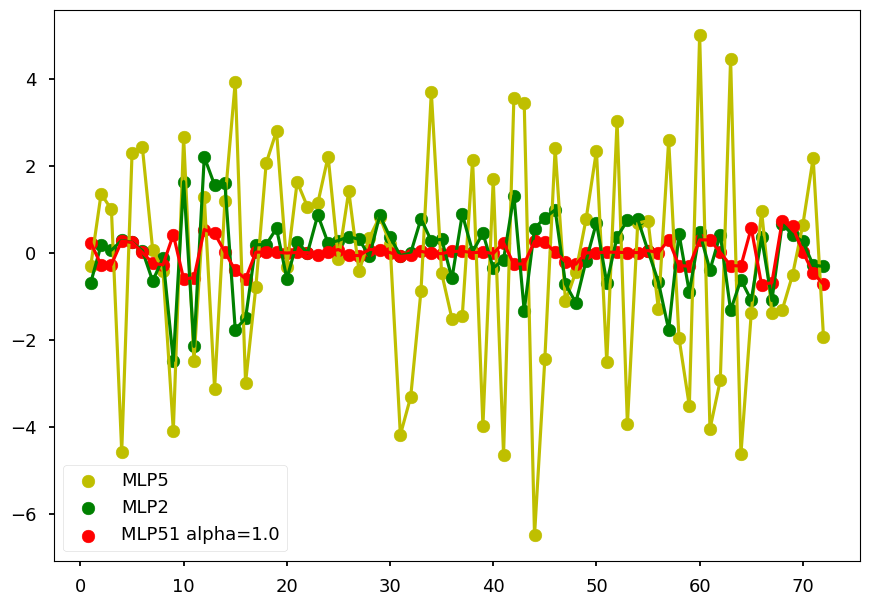

In [ ]:
red_neuronal6 = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=100000, learning_rate_init=0.0001, activation='logistic', alpha=0.7)
cv_resultado6 = cross_val_score(red_neuronal6, X_train, Y_train, cv=kfold, scoring='f1_macro')
promedio6 = np.mean(cv_resultado6)
print("promedio6: ", promedio6)

promedio6:  0.39651824053802354


In [ ]:
red_neuronal6.fit(X_train, Y_train)
pesos_6 = [z for x in red_neuronal6.coefs_ for y in x for z in y]
print(len(pesos_6))

136


In [ ]:
print(len(X_train))

613


# Tablero de Grupos

Grupo | F1-score | Desc.
--- | --- | ---
1 | 0.757 | epocas: 100, aprendizaje: 0.01, (4,8), ReLu
2 | 0.762 | epocas: 200, aprendizaje: 0.01, (100,), Logistic 
3 | 0.727 | epocas: 100, aprendizaje: 0.001, (8,8,8), Logistic 
4 | 0.725 | epocas: 100, aprendizaje: 0.01, (8,2), Logistic
5 | 0.740 | epocas: 100, aprendizaje: 0.001, (8,2), 